In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке,
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
#
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию,
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными,
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 выполняется преподавателем
#
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [4]:
import pandas as pd
import numpy as np
#import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, cross_val_score

from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit

### Область работы 2 (выполнение лучшей модели)

In [5]:
# Данный блок(и) в области 2 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными,
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать,
# тюниговать и т.д. модель машинного обучения

In [6]:
# Путь к тренировочному набору
path_train = "train.csv"  # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test = "test.csv"  # содержит только имя файла, без имен папок

In [7]:
train = pd.read_csv(path_train)
test = pd.read_csv(path_test)

In [8]:
# Блок(и) обучения и поверки модели

In [9]:
train['quality'] = train['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [10]:
train = train[train['total sulfur dioxide'] >= train['total sulfur dioxide'].quantile(0.0001)]
train = train[train['total sulfur dioxide'] <= train['total sulfur dioxide'].quantile(0.985)]

train = train[train['residual sugar'] <= train['residual sugar'].quantile(0.998)]

train = train[train['density'] <= train['density'].quantile(0.999)]

In [11]:
columns_to_transform = ['free sulfur dioxide', 'volatile acidity','residual sugar','chlorides','sulphates']

# Apply np.log1p to the specified columns in both training and testing datasets
train[columns_to_transform] = train[columns_to_transform].apply(np.log1p)
test[columns_to_transform] = test[columns_to_transform].apply(np.log1p)

In [12]:
# Блок предсказания с использованием тестового набора

In [13]:
best_model = make_pipeline(
                           MinMaxScaler(),
                           LogisticRegression(solver='liblinear',
                                              penalty='l2',
                                              C=1.0, 
                                             ))
best_model.fit(train.drop(columns = 'quality'), train['quality'])

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [14]:
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict = best_model.predict(test)

In [15]:
y_predict

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,

0.711864406779661

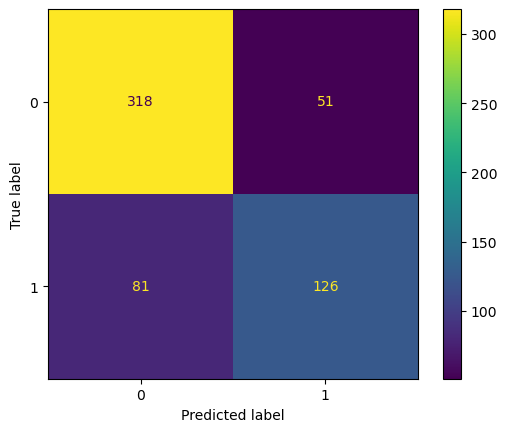

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score


y_true = np.where(pd.read_csv('test_Y_true.csv').values>=7,1,0)
matrix=confusion_matrix(y_true, y_predict)
ConfusionMatrixDisplay(matrix).plot();
precision_score(y_true, y_predict)